In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data about individual colleges
college_data = pd.read_csv('data/MERGED2017_18_PP.csv', low_memory = False) # Opens our data into a dataframe

In [3]:
#Shape before cleaning
college_data.shape

(7112, 1977)

In [4]:
college_data = college_data.dropna(axis = 1, how= 'all')
college_data.shape

(7112, 648)

In [5]:
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='PCIP')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='CIP')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='OMA')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='OME')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='RET')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='D150')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='C150')))]

for col in college_data.columns: 
    print(col)

college_data.shape

import os
out_filepath = os.path.join("data", "cleaned_college_data.csv")
college_data.to_csv(out_filepath, index=False)

UNITID
OPEID
OPEID6
INSTNM
CITY
STABBR
ZIP
ACCREDAGENCY
INSTURL
NPCURL
HCM2
MAIN
NUMBRANCH
PREDDEG
HIGHDEG
CONTROL
ST_FIPS
REGION
LOCALE
LATITUDE
LONGITUDE
CCBASIC
CCUGPROF
CCSIZSET
HBCU
PBI
ANNHI
TRIBAL
AANAPII
HSI
NANTI
MENONLY
RELAFFIL
ADM_RATE
ADM_RATE_ALL
SATVR25
SATVR75
SATMT25
SATMT75
SATVRMID
SATMTMID
ACTCM25
ACTCM75
ACTEN25
ACTEN75
ACTMT25
ACTMT75
ACTCMMID
ACTENMID
ACTMTMID
SAT_AVG
SAT_AVG_ALL
DISTANCEONLY
UGDS
UGDS_WHITE
UGDS_BLACK
UGDS_HISP
UGDS_ASIAN
UGDS_AIAN
UGDS_NHPI
UGDS_2MOR
UGDS_NRA
UGDS_UNKN
PPTUG_EF
CURROPER
NPT4_PUB
NPT4_PRIV
NPT41_PUB
NPT42_PUB
NPT43_PUB
NPT44_PUB
NPT45_PUB
NPT41_PRIV
NPT42_PRIV
NPT43_PRIV
NPT44_PRIV
NPT45_PRIV
NPT4_048_PUB
NPT4_048_PRIV
NPT4_3075_PUB
NPT4_3075_PRIV
NPT4_75UP_PUB
NPT4_75UP_PRIV
NUM4_PUB
NUM4_PRIV
NUM41_PUB
NUM42_PUB
NUM43_PUB
NUM44_PUB
NUM45_PUB
NUM41_PRIV
NUM42_PRIV
NUM43_PRIV
NUM44_PRIV
NUM45_PRIV
COSTT4_A
COSTT4_P
TUITIONFEE_IN
TUITIONFEE_OUT
TUITIONFEE_PROG
TUITFTE
INEXPFTE
AVGFACSAL
PFTFAC
PCTPELL
POOLYRS
PFTFTUG1_EF
C200_4
C

In [6]:
salary_data = pd.read_csv('data/FieldOfStudyData1516_1617_PP.csv', low_memory = False) # Opens our data into a dataframe

In [7]:
print(salary_data.shape)
salary_data.head()

(216638, 18)


,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


In [8]:
salary_data = salary_data[~salary_data['MD_EARN_WNE'].isin(['PrivacySuppressed'])] # Remove all rows that contain privacy suppressed
salary_data = salary_data[~salary_data['DEBTMEDIAN'].isin(['PrivacySuppressed'])] # Remove all rows that contain privacy suppressed
salary_data = salary_data[salary_data['CREDDESC'].str.contains('Bachelor')] # Keep all rows that contain bachelor
print(salary_data.shape)
salary_data.head()

(20590, 18)


,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,25,36250,376,37194,33,33,54300,17.0,16.0
24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelors Degree,46,31505,327,33085,32,31,25400,24.0,33.0
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelors Degree,22,34809,361,36482,33,31,54500,19.0,11.0
28,100654.0,1002,Alabama A & M University,Public,1,1419,Mechanical Engineering.,3,Bachelors Degree,PrivacySuppressed,36928,383,38900,24,24,45800,13.0,17.0
37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelors Degree,39,29956,311,30970,30,30,24000,28.0,28.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

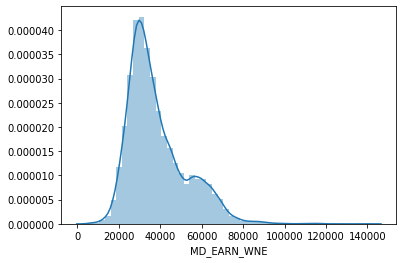

In [10]:
sns.distplot(salary_data["MD_EARN_WNE"]) # Graph of average earnings 1 year out of college

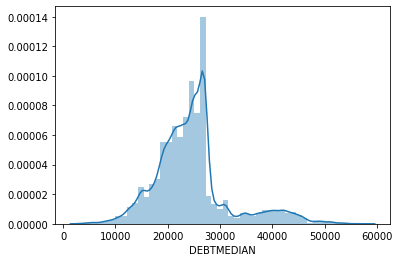

In [11]:
sns.distplot(salary_data["DEBTMEDIAN"]) # Graph of median college debt after graduating college

In [12]:
import os
out_filepath = os.path.join("data", "cleaned_salary_data.csv")
salary_data.to_csv(out_filepath, index=False)

In [13]:
location_data = college_data[['INSTNM', 'STABBR', 'LATITUDE', 'LONGITUDE']]
location_data.head()

,INSTNM,STABBR,LATITUDE,LONGITUDE
0,Alabama A & M University,AL,34.783368,-86.568502
1,University of Alabama at Birmingham,AL,33.505697,-86.799345
2,Amridge University,AL,32.362609,-86.174010
3,University of Alabama in Huntsville,AL,34.724557,-86.640449
4,Alabama State University,AL,32.364317,-86.295677


In [14]:
salary_data['MD_EARN_WNE'] = salary_data['MD_EARN_WNE'].str.extract('(\d+)').astype(int)
salary_data['DEBTMEDIAN'] = salary_data['DEBTMEDIAN'].str.extract('(\d+)').astype(int)

salary_data['BESTVALUE'] = salary_data['MD_EARN_WNE']/salary_data['DEBTMEDIAN']


In [15]:
salary_data.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,BESTVALUE
15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,25,36250,376,37194,33,33,54300,17.0,16.0,1.497931
24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelors Degree,46,31505,327,33085,32,31,25400,24.0,33.0,0.806221
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelors Degree,22,34809,361,36482,33,31,54500,19.0,11.0,1.565687
28,100654.0,1002,Alabama A & M University,Public,1,1419,Mechanical Engineering.,3,Bachelors Degree,PrivacySuppressed,36928,383,38900,24,24,45800,13.0,17.0,1.240251
37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelors Degree,39,29956,311,30970,30,30,24000,28.0,28.0,0.801175


In [19]:
combined_data = pd.merge(location_data, salary_data, on='INSTNM')
combined_data.head()
combined_data.sort_values(by=['BESTVALUE', 'STABBR'], ascending=False)

,INSTNM,STABBR,LATITUDE,LONGITUDE,UNITID,OPEID6,CONTROL,MAIN,CIPCODE,CIPDESC,...,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,BESTVALUE
7109,Massachusetts Institute of Technology,MA,42.359243,-71.093226,166683.0,2178,"Private, nonprofit",1,2701,Mathematics.,...,30,8219,85,12251,25,23,120300,122.0,112.0,14.636817
11428,Duke University,NC,36.001135,-78.937624,198419.0,2920,"Private, nonprofit",1,2701,Mathematics.,...,25,5500,57,7387,31,27,74700,58.0,60.0,13.581818
11419,Duke University,NC,36.001135,-78.937624,198419.0,2920,"Private, nonprofit",1,1107,Computer Science.,...,98,7890,82,9795,111,109,99600,175.0,230.0,12.623574
15733,The University of Texas Rio Grande Valley,TX,26.306759,-98.173567,227368.0,3599,Public,1,1412,Engineering Physics.,...,25,3750,39,4426,PrivacySuppressed,PrivacySuppressed,42700,33.0,12.0,11.386667
14519,Brown University,RI,41.826170,-71.403850,217156.0,3401,"Private, nonprofit",1,1107,Computer Science.,...,68,12871,134,12972,62,59,141100,124.0,144.0,10.962629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19321,American InterContinental University,IL,42.033191,-88.032424,445027.0,21136,"Private, for-profit",1,5006,Film/Video and Photographic Arts.,...,41,49579,515,47685,25,20,18400,NaN,NaN,0.371125
19144,American InterContinental University-Atlanta,GA,33.938779,-84.354907,438586.0,21136,"Private, for-profit",0,5006,Film/Video and Photographic Arts.,...,41,49579,515,47685,25,20,18400,23.0,22.0,0.371125
3277,AI Miami International University of Art and D...,FL,25.790008,-80.188390,134811.0,8878,"Private, for-profit",1,1002,Audiovisual Communications Technologies/Techni...,...,38,43145,448,42076,47,44,15800,27.0,20.0,0.366207
11534,Livingstone College,NC,35.670877,-80.483956,198862.0,2942,"Private, nonprofit",1,4407,Social Work.,...,20,44250,459,41367,34,33,14500,20.0,15.0,0.327684


In [20]:
out_filepath = os.path.join("data", "best_value_data.csv")
combined_data.to_csv(out_filepath, index=False)